### 평균 (30퍼)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
original_df = pd.read_csv('../data/AB_NYC_2019.csv')
df = original_df.copy() # 원본 데이터 저장

In [ ]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### describe()

- price의 min에 **0달러 (11개)** >> 0 달러 레코드만 삭제(실제로 에어비앤비에서 뉴욕 에어비앤비 요금 검색을 했을 때 0달러 숙소는 없음을 확인)
- minimun_nights의 **max에 1250** >> **365를 초과하는 레코드 삭제**

In [ ]:
# availability_365 0 레코드 수 확인
df[df['availability_365']==0]['availability_365'].count()

17533

In [ ]:
# price 0 레코드 수 확인
df[df['price']==0]['price'].count()

11

<AxesSubplot:title={'center':'Price Histogram'}, xlabel='price', ylabel='Density'>

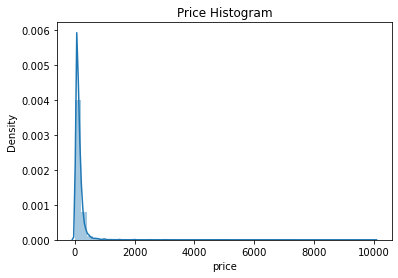

In [ ]:
# price 분포 확인
plt.title('Price Histogram')
sns.distplot(df['price']) 

<AxesSubplot:xlabel='neighbourhood_group', ylabel='minimum_nights'>

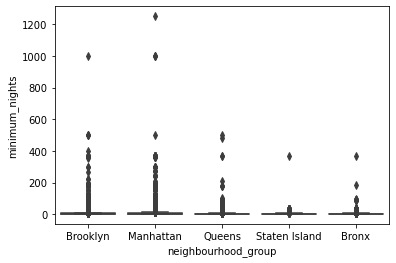

In [ ]:
# minimum_nights 박스플롯으로 확인

sns.boxplot(data = df, x='neighbourhood_group', y='minimum_nights') # 1200 => 이상치 확인!

## 전처리

### 8개의 피처 삭제!

- id 삭제 (의미없는 숫자)
- name 삭제 (문자)
- host_id 삭제 (의미없는 숫자)
- host_name 삭제 (문자)
- neighbourhood 삭제 (221개 삭제)
- latitude 삭제 (강사님 조언)
- longitude 삭제 (강사님 조언)
- last_review 삭제 (문자)


In [ ]:
df.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'last_review'], axis=1, inplace=True)

In [ ]:
df.head(3)

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Private room,150,3,0,NaN,1,365


### 1. reviews_per_month NaN값 => '0'으로 대체

In [ ]:
# reviews_per_month NaN값 >> 0으로 대체
df['reviews_per_month'] = df['reviews_per_month'].replace(np.nan, 0).astype(int)

### 2. availability_365 0값 => '평균', '중위수', '365'로 대체 (3가지 케이스)
#### 여기서는 평균으로 대체!

In [ ]:
# availability_365 0값 >> 중위수으로 대체
df['availability_365'] = df['availability_365'].replace(0, df['availability_365'].mean()).astype(int) # 152

In [ ]:
df['availability_365'].describe() # 0값이 1값으로 변경됨!

count    48895.000000
mean       152.942816
std        105.595976
min          1.000000
25%        100.000000
50%        112.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

### 3. minimum_nights => 365를 초과하는 값 삭제, 30이 넘는 값은 30으로 대체 (두가지 케이스)

In [ ]:
# minimum_nights 365를 초과하는 값 삭제
df_index = df[df['minimum_nights'] > 365].index
df = df.drop(df_index)

In [ ]:
# minimum_nights 365 초과하는 값 삭제 됐는지 확인
df[df['minimum_nights'] > 365].count()

neighbourhood_group               0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df['minimum_nights']

0         1
1         1
2         3
3         1
4        10
         ..
48890     2
48891     4
48892    10
48893     1
48894     7
Name: minimum_nights, Length: 48881, dtype: int64

<AxesSubplot:xlabel='neighbourhood_group', ylabel='minimum_nights'>

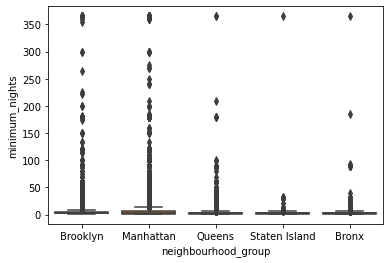

In [ ]:
# minimum_nights 박스플롯으로 확인
sns.boxplot(data = df, x='neighbourhood_group', y='minimum_nights')

In [ ]:
# price 0 레코드 삭제
df = df[df['price'] != 0] # price가 0이 아닌것만 df에 저장

In [ ]:
# price 0 삭제됐는지 확인
df[df['price']==0]['price'].count()

0

In [ ]:
# price 로그 변환
original_df_price = df['price'] # 원래 SalePrice original_SalePrice에 저장
df['price'] = np.log1p(df['price']) # 로그 변환 값으로 타겟값 '대체'

<AxesSubplot:title={'center':'Price Histogram'}, xlabel='price', ylabel='Density'>

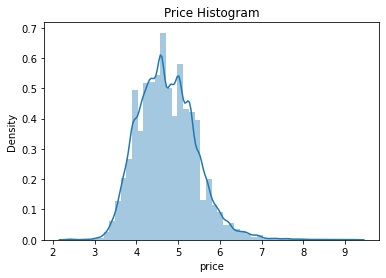

In [ ]:
# 로그 변환 확인
plt.title('Price Histogram')
sns.distplot(df['price'])

In [ ]:
df.shape

(48870, 8)

### 원-핫 인코딩 => 'neighbourhood_group', 'room_type'

#### prefix => 접두사 ng(neighbourhood group) / rt(root type)

In [ ]:
df_ohe = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], prefix = ['ng', 'rt']) 

In [ ]:
df_ohe.head(5)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ng_Bronx,ng_Brooklyn,ng_Manhattan,ng_Queens,ng_Staten Island,rt_Entire home/apt,rt_Private room,rt_Shared room
0,5.010635,1,9,0,6,365,0,1,0,0,0,0,1,0
1,5.420535,1,45,0,2,355,0,0,1,0,0,1,0,0
2,5.017280,3,0,0,1,365,0,0,1,0,0,0,1,0
3,4.499810,1,270,4,1,194,0,1,0,0,0,1,0,0
4,4.394449,10,9,0,1,112,0,0,1,0,0,1,0,0


### 학습 전 데이터 분리 => 두 가지 케이스 (7:3)
#### 여기서는 7:3를 사용!

In [ ]:
X_features = df_ohe.drop(['price'], axis=1) 
y_target = df_ohe['price']  

In [ ]:
# 학습 / 테스트 데이터 세트 분리
# 테스트 데이터 세트 : 30% 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_features, y_target, test_size=0.3, random_state=11) # test_size=0.3 => 30%

----------------------------------------

### 다항(2차, 3차) 회귀 모델의 학습/예측/평가 (추가!)

#### Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합 (3가지) 수행


#### 총 3가지의 케이스를 수행할 것!
(1) degree=2 => 2차 다항

(2) degree=2, include_bias=False => **2차 다항**인데 편향성 까지 제외

(3) degree=3, include_bias=False => **3차 다항**인데 편향성 까지 제외

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [ ]:
# (1) degree=2 2차다항으로 만들기
# 파이프라인 작업 구성하기
# Pipeline([('작업명',작업1), ('작업명',작업2),....('작업명',작업n)])
p_model = Pipeline([ ('poly', PolynomialFeatures(degree=2)),
                     ('linear', LinearRegression()) ])

# pipeline에 data를 전달해서 학습 진행
p_model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('linear', LinearRegression())])

In [ ]:
# linear스텝의 속성 coef_를 반환
# W (회귀 계수)

print('Polynomial 회귀 계수\n', np.round(p_model.named_steps['linear'].coef_, 3))

Polynomial 회귀 계수
 [ 0.    -0.005 -0.001 -0.025 -0.013 -0.    -0.092 -0.027  0.106 -0.059
  0.072  0.201 -0.111 -0.09   0.     0.     0.001  0.    -0.    -0.001
  0.    -0.001 -0.001 -0.002 -0.002 -0.002 -0.001  0.    -0.    -0.
 -0.    -0.     0.001 -0.    -0.    -0.001 -0.001  0.    -0.    -0.
  0.     0.    -0.021 -0.005  0.036 -0.002 -0.033  0.005  0.005 -0.035
 -0.    -0.     0.014  0.014  0.014  0.009 -0.065  0.003  0.003 -0.019
  0.    -0.    -0.     0.    -0.    -0.     0.001 -0.    -0.001 -0.092
  0.     0.     0.     0.     0.01  -0.036 -0.066 -0.027  0.     0.
  0.     0.16   0.004 -0.191  0.106  0.     0.     0.113  0.02  -0.027
 -0.059  0.     0.041  0.026 -0.125  0.072 -0.123 -0.125  0.319  0.201
  0.     0.    -0.111  0.    -0.09 ]


#### (1) degree=2 => 2차 다항

In [ ]:
# degree=2 => 2차 다항
# 학습된 회귀식을 이용해 예측
y_preds = p_model.predict(X_test) 

# 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 0.249 , RMSE : 0.499
Variance score : 0.479


#### (2) degree=2, include_bias=False => 2차 다항인데 편향성 까지 제외

In [ ]:
# (2) degree=2, include_bias 튜닝
# 파이프라인 작업 구성하기
# Pipeline([('작업명',작업1), ('작업명',작업2),....('작업명',작업n)])
p_model = Pipeline([ ('poly', PolynomialFeatures(degree=2, include_bias=False)), # include_bias=False 포함!!
                     ('linear', LinearRegression()) ])

# pipeline에 data를 전달해서 학습 진행
p_model.fit(X_train, y_train)

# 예측
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 0.249 , RMSE : 0.499
Variance score : 0.479


#### (3) degree=3, include_bias=False => 3차 다항인데 편향성 까지 제외

In [ ]:
# (3) degree=3, include_bias=False
# 파이프라인 작업 구성하기
# Pipeline([('작업명',작업1), ('작업명',작업2),....('작업명',작업n)])
p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)

y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 0.247 , RMSE : 0.497
Variance score : 0.484


## 결과

#### (1) degree=2 => 2차 다항
- MSE : 0.249 , RMSE : 0.499
- Variance score : 0.479

#### (2) degree=2, include_bias=False => 2차 다항인데 편향성 까지 제외
- MSE : 0.249 , RMSE : 0.499
- Variance score : 0.479
    
#### (3) degree=3, include_bias=False => 3차 다항인데 편향성 까지 제외
- MSE : 0.247 , RMSE : 0.497
- Variance score : 0.484

--------------------------------------------

### 선형/릿지/라쏘 회귀 모델의 학습/예측/평가

In [ ]:
# 단일 모델의 RMSE 값 반환
def get_rmse(model): # 학습된 모델을 받아서 예측
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__, np.round(rmse, 3))) 
    return rmse


# 여러 모델의 RMSE 값 반환
def get_rmses(models) : 
    rmses = []
    for model in models :
        rmse = get_rmse(model) # 단일 모델의 RMSE 값 반환 함수 = get_rmse 
        rmses.append(rmse)
    return rmses

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso # 선형 회귀
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# 일반 선형 회귀 = linear regression
lr_reg = LinearRegression() # 1차 선형 회귀
lr_reg.fit(X_train, y_train)

# 릿찌 회귀 = ridge regression
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

# 라쏘 회귀 = lasso regression
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [ ]:
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) # 학습된 모델 전달하고 # rmse값 반환

LinearRegression 로그 변환된 RMSE: 0.509
Ridge 로그 변환된 RMSE: 0.509
Lasso 로그 변환된 RMSE: 0.685


[0.5088429840949216, 0.5088439874991775, 0.6849403694229915]

### 첫번째 결과 (선형/릿지/라쏘 회귀 모델)

#### 라쏘 회귀(0.6861168996208226)가 타 회귀 방식보다 상대적으로 성능이 떨어진다!!


#### 하이퍼 파라미터 튜닝이 필요함! (alpha 하이퍼 파라미터에 대해서 최적화 수행)

--------------------------------------------------------

In [ ]:
def get_top_bottom_coef(model) :
    coef = pd.Series(model.coef_, index=X_features.columns)
    coef_high = coef.sort_values(ascending=False).head(10) 
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

In [ ]:
# 모델별 회귀 계수 시각화 함수
# list 객체로 모델을 입력 받아서
# 모델별로 회귀 계수 상위 '10개', 하위 '10개' 추출해서 # 가로 막대 그래프 형태로 출력
def visualize_coefficient(models) :
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(20,10),nrows=1, ncols=3) 
    fig.tight_layout()
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화.
    for i_num, model in enumerate(models) :
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합.
        coef_high, coef_low = get_top_bottom_coef(model) 
        coef_concat = pd.concat( [coef_high , coef_low] )
    
    # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크
        axs[i_num].set_title(model.__class__.__name__ +' Coeffiecents', size=25) 
        axs[i_num].tick_params(axis="y",direction="in", pad=-190) # 안쪽, 패딩값

        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()) : 
            label.set_fontsize(13)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

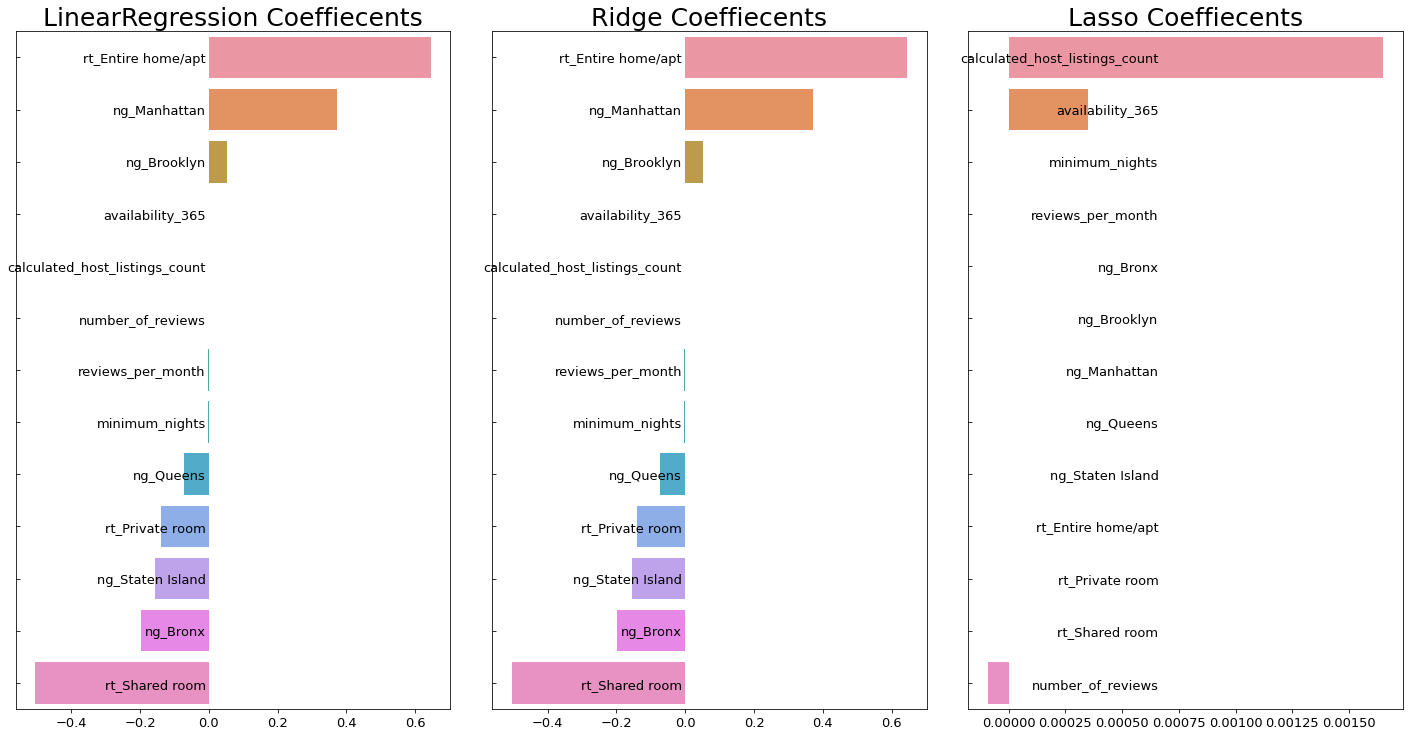

In [ ]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

- OLS 기반의 **LinearRegression**과 **Ridge** : 회귀 계수가 유사한 형태로 분포
    - **최소자승법(OLS: Ordinary Least Squares)는 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 구하는 방법**이다. 
    - 우리가 사용하는 예측 모형은 다음과 같이 상수항이 결합된 선형모형이다.
    
    
    
    
- **Lasso** : **전체적으로 회귀 계수 값이 매우 작음**
    - calculated_host_listing_count가 값이 가장 크고, 다른 피처의 회기 계수는 너무 작음
    - LinearRegression과 Ridge와 다른 회귀 계수 형태

### 5폴드 교차검증으로 모델별로 RMSE와 평균 RMSE 출력 (cv=5) 

In [ ]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models) :
    for model in models :
        # 데이터 분할하지 않고, 전체 데이터 세트로 교차 검증 진행
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target, scoring='neg_mean_squared_error', cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

In [ ]:
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.508 0.485 0.506 0.505 0.534]
LinearRegression CV 평균 RMSE 값: 0.507

Ridge CV RMSE 값 리스트: [0.508 0.485 0.506 0.505 0.534]
Ridge CV 평균 RMSE 값: 0.507

Lasso CV RMSE 값 리스트: [0.656 0.645 0.678 0.704 0.748]
Lasso CV 평균 RMSE 값: 0.686


### 두번째 결과 (5폴드 교차검증)

- 5개 폴드 세트로 학습한 후 평가해도 
    - **여전히 라쏘 모델(0.686)이 다른 회귀 모델에 비해 성능이 떨어짐**

----------------------------------------

### 리지/라쏘 모델에 대해 alpha 하이퍼파라미터 튜닝 후 재학습/예측/평가

In [ ]:
from sklearn.model_selection import GridSearchCV
# 모델과 하이퍼 파라미터 딕셔너리 객체를 받아서
# 최적화 작업의 결과를 표시하는 함수
# 릿지 모델과 라쏘 모델의 최적화 alpha 값 추출

def get_best_params(model, params) :
    
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                                              np.round(rmse, 4), grid_model.best_params_))
    
    return grid_model.best_estimator_ # 최적 파라미터로 재학습된 모델 반환

In [ ]:
ridge_params = {'alpha' : [0.00001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 7, 10]}

lasso_params = {'alpha' : [0.00001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 7, 10]}

In [ ]:
best_ridge = get_best_params(ridge_reg, ridge_params)

best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.5076, 최적 alpha:{'alpha': 1e-05}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.5077, 최적 alpha:{'alpha': 1e-05}


### Ridge 5 CV 시 최적 평균 RMSE 값: 0.5025, 최적 alpha:{'alpha': 1e-05 (X) => 0.05 (O)}
### Lasso 5 CV 시 최적 평균 RMSE 값: 0.5025, 최적 alpha:{'alpha': 0.00001 (O)}

#### alpha 범위 : 0.00001 ~ 10

In [ ]:
### 알파값(alpha)을 변경(0.00001 ~ 10)하면서 최적의 파라미터를 찾기 위해
alpha = [0.00001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 7, 10] # 0.00001 ~ 10

In [ ]:
from sklearn.model_selection import GridSearchCV

def get_params(model, params) :
    param_list = []
    for param in params :
        param_alpha = {'alpha' : [param]} # 딕셔너리 형태로 넘겨줘야!!
        grid_model = GridSearchCV(model, param_grid=param_alpha, scoring='neg_mean_squared_error', cv=5)
        grid_model.fit(X_features, y_target)
        rmse = np.sqrt(-1 * grid_model.best_score_) # best_score_ => mse (cv=5 => 5번 돌리는 동안)
    
        param_list.append(rmse)
    
    return param_list # 최적 파라미터로 재학습된 모델을 반환해주게 됨

###  릿지 => 0.05 : 0.5076497800675304 ('0.5076497'에서 변함 없으므로 0.05가 최적의 alpha 값)
#### '릿지는 0.05이 최적의 파라미터 alpha이다.'

In [ ]:
for i in range(len(alpha)) :
    print(alpha[i], get_params(ridge_reg, alpha)[i]) # 0.05 0.5076497

1e-05 0.5076497450442649
0.0001 0.5076497451072713
0.001 0.5076497457373452
0.005 0.507649748537884
0.01 0.507649752039039
0.05 0.5076497800675304
0.1 0.5076498151512664
1 0.507650455781342
5 0.507653509858632
7 0.5076551616019265
10 0.5076577920327185


### 라쏘=> 0.0001 : 0.5076557831609503 ('0.50765'에서 변함 없으므로 0.0001 이 최적의 alpha 값)
#### '라쏘는 0.0001 이 최적의 파라미터 alpha이다.'

In [ ]:
for i in range(len(alpha )) :
    print(alpha[i], get_params(lasso_reg, alpha)[i]) # 0.0001 0.5076557831609503

1e-05 0.5076504258686468
0.0001 0.5076557831609503
0.001 0.5078215088561538
0.005 0.5101572297319558
0.01 0.5133823201276145
0.05 0.5310503621742259
0.1 0.578562122360455
1 0.6871396246833519
5 0.6928072369262379
7 0.6932286767833257
10 0.6932357326606897


In [ ]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=0.05)    # 위에서 구한 최적의 알파 값(0.05)을 릿지에 대입
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.0001) # 위에서 구한 최적의 알파 값(0.0001)을 라쏘에 대입
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [ ]:
# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.509
Ridge 로그 변환된 RMSE: 0.509
Lasso 로그 변환된 RMSE: 0.509


[0.5088429840949216, 0.5088430337513438, 0.5088601405903651]

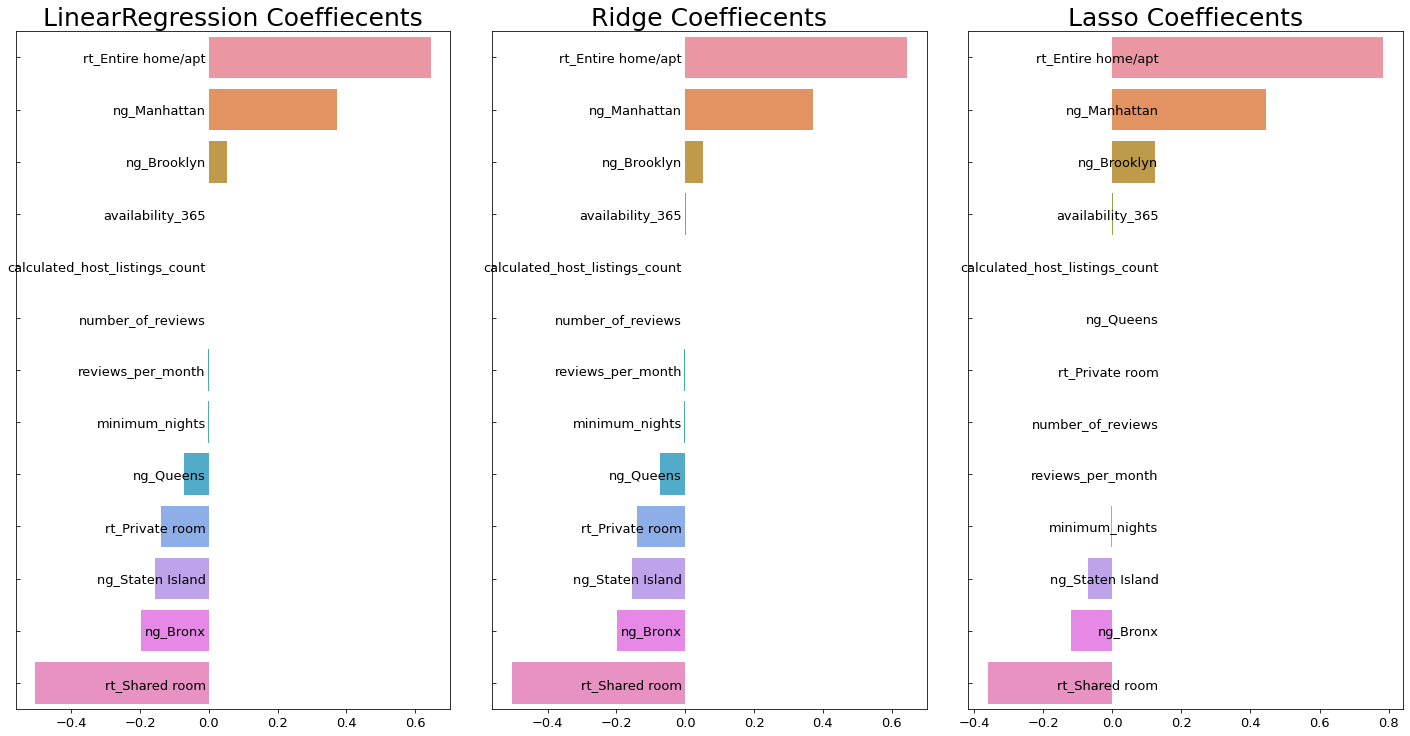

In [ ]:
# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

### 세번째 결과 (리지/라쏘 모델에 대해 alpha 하이퍼파라미터 튜닝 후)

- 릿지 모델 : **alpha가 0.05**에서 최적 평균 RMSE가 **0.5024900**
- 라쏘 모델 : **alpha가 0.00001**에서 최적 평균 RMSE가 **0.50248**


#### 라쏘 : alpha 최적화한 후 예측 성능 향상됨! (0.686 -> 0.502)

-----------------------------------------------------------

### 데이터 세트를 추가적으로 가공해서 모델 튜닝을 좀 더 진행

1. 피처 데이터 세트의 데이터 **분포도** 확인  
2. **이상치 데이터 처리**

#### 위에서 미리 원핫 인코딩을 준비함 (df_ohe)

In [ ]:
from scipy.stats import skew


# 숫자형 피처에서 원-핫 인코딩된 카테고리 숫자형 피처는 제외
# '원본 데이터'에서 dtype이 '오브젝트가 아닌 걸'로 가져와야 함
features_index = df_ohe.dtypes[df_ohe.dtypes != 'object'].index

In [ ]:
features_index

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'ng_Bronx',
       'ng_Brooklyn', 'ng_Manhattan', 'ng_Queens', 'ng_Staten Island',
       'rt_Entire home/apt', 'rt_Private room', 'rt_Shared room'],
      dtype='object')

In [ ]:
df_ohe[features_index].apply(lambda x : skew(x)) # 어플라이 함수 내부에 들어가는 내용이 사용자 정의 함수로 들어가야 함

# 람다식을 통해 간단한 함수 만들어서 어플라이 함수 진행
# 각각의 컬러마다 skew 함수 적용!

price                              0.629496
minimum_nights                    11.615998
number_of_reviews                  3.690570
reviews_per_month                  3.752118
calculated_host_listings_count     7.930835
availability_365                   0.719631
ng_Bronx                           6.469751
ng_Brooklyn                        0.361483
ng_Manhattan                       0.229113
ng_Queens                          2.399848
ng_Staten Island                  11.314878
rt_Entire home/apt                -0.078883
rt_Private room                    0.174178
rt_Shared room                     6.266003
dtype: float64

### skew 정도가 '1' 이상이면 많이 왜곡됐다고 봄 => 1 이상인 컬럼만 추출 진행

In [ ]:
skew_featrues = df_ohe[features_index].apply(lambda x : skew(x))

In [ ]:
skew_features_top = skew_featrues[skew_featrues > 1]   # 왜곡정도가 '1'보다 큰
print(skew_features_top.sort_values(ascending=False))  # 내림차순 정렬

minimum_nights                    11.615998
ng_Staten Island                  11.314878
calculated_host_listings_count     7.930835
ng_Bronx                           6.469751
rt_Shared room                     6.266003
reviews_per_month                  3.752118
number_of_reviews                  3.690570
ng_Queens                          2.399848
dtype: float64


### 왜곡이 심한 컬럼에 로그변환 후 재학습/예측/평가

In [ ]:
df_ohe[skew_features_top.index] = np.log1p(df_ohe[skew_features_top.index])

### Skew가 높은(1보다 큰) 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 

In [ ]:
# Skew가 높은 피처들을 로그 변환 했으므로 
# 다시 원-핫 인코딩 적용 
# 피처/타겟 데이터 세트 다시 생성
# 최적 alpha 값과 RMSE 출력

# 원-핫 인코딩
airbnb_df_ohe = pd.get_dummies(df_ohe)
# 피처/타겟 데이터 세트 다시 생성
y_target = airbnb_df_ohe['price']
X_features = airbnb_df_ohe.drop('price',axis=1, inplace=False)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=156) # 30퍼

In [ ]:
# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha' : [0.000001, 0.00001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 7, 10] }
lasso_params = { 'alpha' : [0.000001, 0.00001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 7, 10] }
best_ridge = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.5025, 최적 alpha:{'alpha': 1e-06}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.5025, 최적 alpha:{'alpha': 1e-05}


### 네번째 결과 (왜곡이 심한 컬럼에 로그변환 후)
- 릿지 : 1e-06 (RMSE 값이 계속 감소함 => 리스트에서 가장 작은 값이 최적 alpha 값이 됨) => 최적 평균 RMSE 값: 0.5021, 최적 alpha:{'alpha': 1e-06}


- 라쏘 : 0.0001 (0.00001까지 줄여봤지만 0.00001이 최적 알파값) => 최적 평균 RMSE 값: 0.5021, 최적 alpha:{'alpha': 0.0001}


In [ ]:
# 분할된 학습/테스트 데이터를 이용해서
# 모델의 학습/예측/평가 및 모델별 회귀 계수 시각화

# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=0.05)    # 0.05 (위에서 찾은 값)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.0001) # 0.0001 (위에서 찾은 값)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [ ]:
# 모든 모델의 RMSE cnffur
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.504
Ridge 로그 변환된 RMSE: 0.504
Lasso 로그 변환된 RMSE: 0.504


[0.5044188633606091, 0.5044187322529057, 0.5044087424412739]

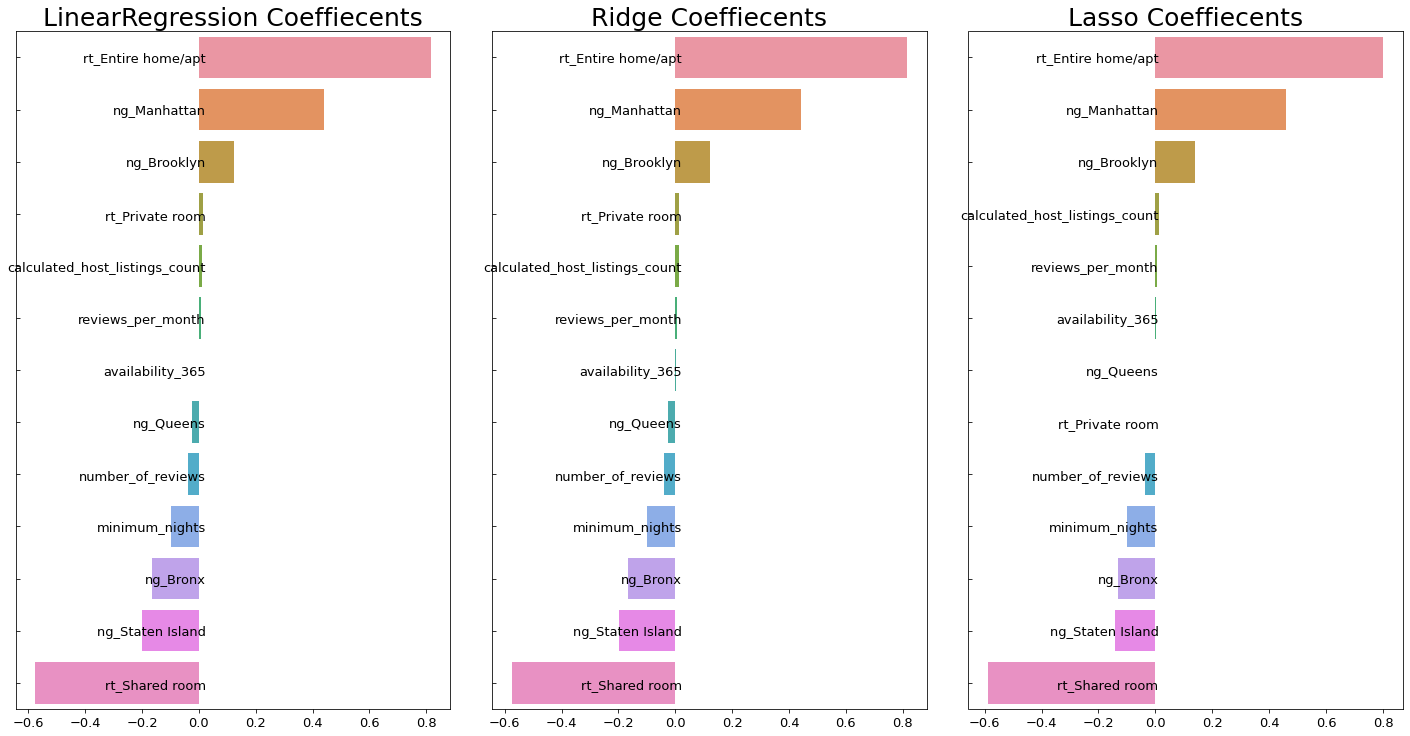

In [ ]:
# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

### 확인 결과

- 모든 모델이 **rt_Entire_home/apt**를 가장 중요한 피처(**상관성이 높음**)로 **보고 있음을 확인**

### 결과

- 세 모델 모두 **rt_Entire_home/apt**가 회귀 계수가 **가장 높은 피처**가 됨
    - **room type이 주택 가격에 미치는 영향이 제일 높다는 의미**
    - **결과가 상식적으로 도출됨**
    - **맨하탄 역시 가격과 상관관계가 있음을 확인**

----------------------------------------------------------------

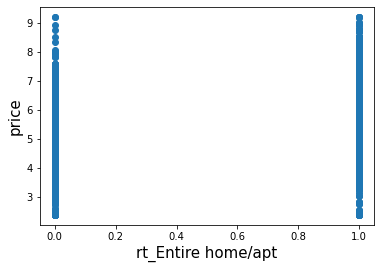

In [ ]:
plt.scatter(x=airbnb_df_ohe['rt_Entire home/apt'], y=airbnb_df_ohe['price']) # 원본 데이터로 확인
plt.ylabel('price', fontsize=15)
plt.xlabel('rt_Entire home/apt', fontsize=15)
plt.show()

### 원-핫 인코딩된 값이므로 0과 1 밖에 없음 => 이상치 확인을 할 수가 없음
### 따라서 앞에서 계획한 이상치 제거는 패스

----------------------------------------------------------

## 회귀 트리 학습/예측/평가 (강의에서 했던 예제 파라미터와 동일하게 설정)

**XGBoost와 LightGBM 학습/예측/평가**

In [ ]:
# XGBoost와 LightGBM 모두 수행 시간이 오래 걸릴 수 있는 관계로
# 하이퍼 파라미터 설정을 미리 적용한 상태로
# 5 폴드 세트에 대한 평균 RMSE 값 추출
from xgboost import XGBRegressor

xgb_params = {'n_estimators' : [1000]}

xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)

best_xgb = get_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.4875, 최적 alpha:{'n_estimators': 1000}


In [ ]:
# 이번에는 LightGBM 회귀 트리 적용
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

best_lgbm = get_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.4864, 최적 alpha:{'n_estimators': 1000}


In [ ]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도 값을 Series로 반환
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns)
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

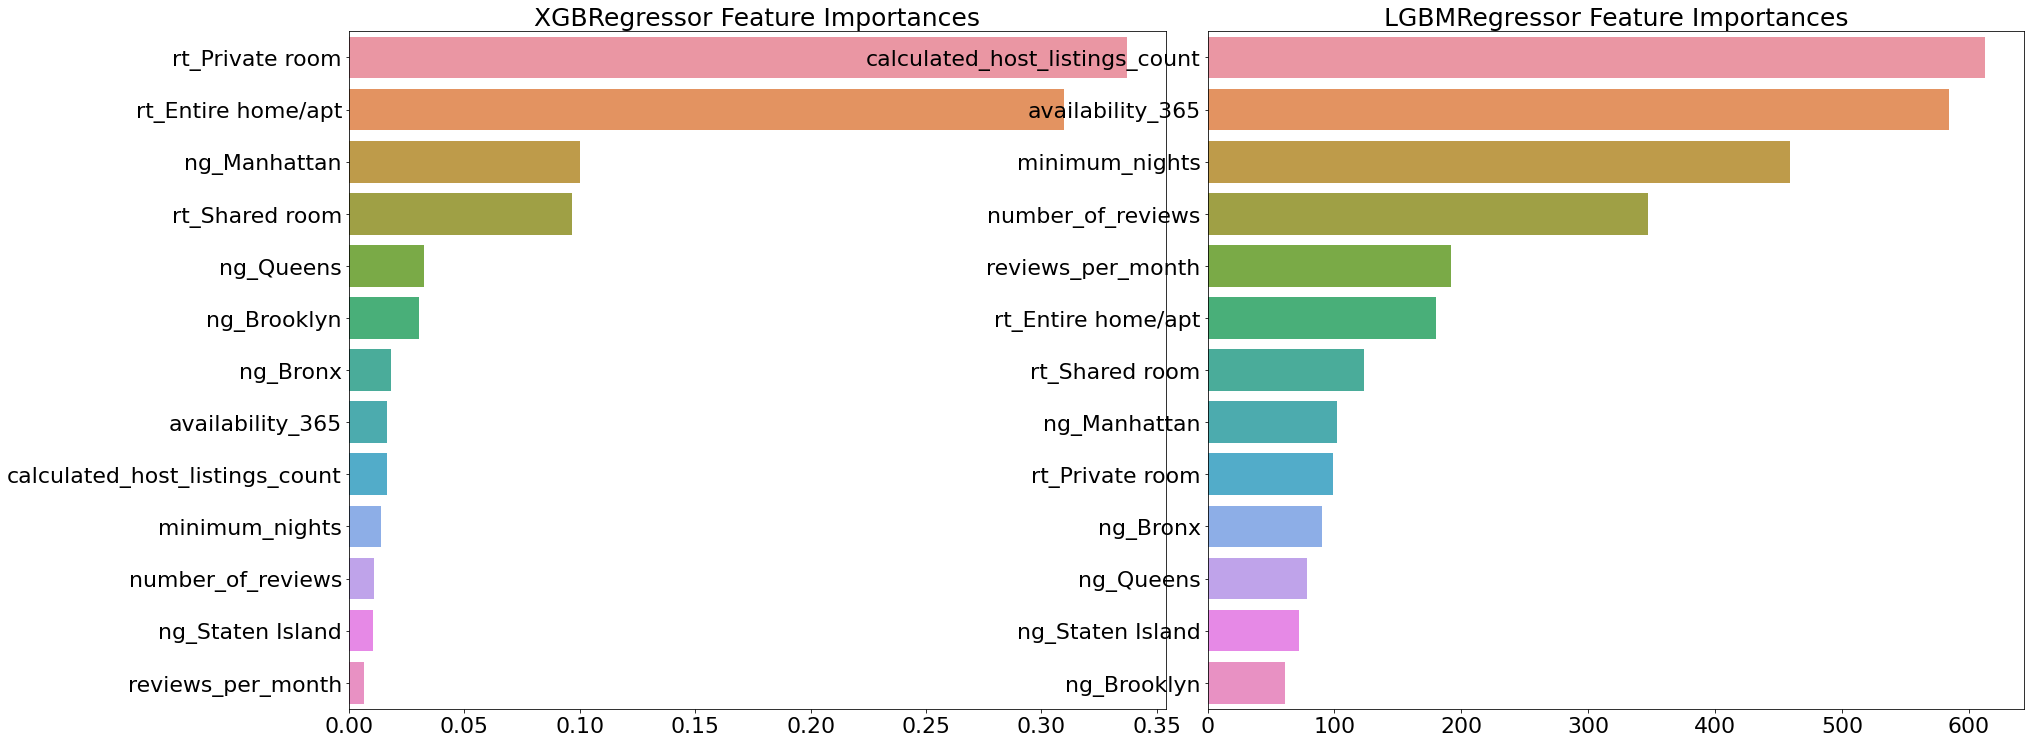

In [ ]:
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

### 결과
- XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.4878, 최적 alpha:{'n_estimators': 1000}
- LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.4864, 최적 alpha:{'n_estimators': 1000}

---------------------------------------------------

### 회귀 모델들의 예측 결과 혼합을 통한 최종 예측

- 개별 회귀 모델의 예측 결과값을 혼합해서 이를 기반으로 최종 회귀값을 예측하는 방법임


- ex) A모델, B모델이 있음


    - A모델의 예측값의 40%, B모델의 예측값의 60%를 더해서 최종 회귀값으로 예측하게 됨
    - A[100, 80, 60], B[120, 80, 50]
    - >> [100 * 0.4 + 120 * 0.6, 80 * 0.4 + 80 * 0.6, 60 * 0.4 + 50 * 0.6]

In [ ]:
# 최종 혼합 모델과 개별 모델의 RMSE 값 출력하는 함수 생성
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

In [ ]:
# 개별 모델 학습
ridge_reg = Ridge(alpha=0.05)    # 위에서 찾은 최적의 alpha 값 (0.05)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.0001) # 위에서 찾은 최적의 alpha 값 (0.0001)
lasso_reg.fit(X_train, y_train)

# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

In [ ]:
# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred

preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}

# 최종 혼합 모델, 개별 모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.5044114506904088
Ridge 모델의 RMSE: 0.5044187322529057
Lasso 모델의 RMSE: 0.5044087424412739


In [ ]:
# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.5 * ridge_pred + 0.5 * lasso_pred

preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}

# 최종 혼합 모델, 개별 모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.5044123960210106
Ridge 모델의 RMSE: 0.5044187322529057
Lasso 모델의 RMSE: 0.5044087424412739


In [ ]:
# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.6 * ridge_pred + 0.4 * lasso_pred

preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}

# 최종 혼합 모델, 개별 모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.5044134486578356
Ridge 모델의 RMSE: 0.5044187322529057
Lasso 모델의 RMSE: 0.5044087424412739


In [ ]:
# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.7 * ridge_pred + 0.3 * lasso_pred

preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}

# 최종 혼합 모델, 개별 모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.5044146086002121
Ridge 모델의 RMSE: 0.5044187322529057
Lasso 모델의 RMSE: 0.5044087424412739


In [ ]:
# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.3 * ridge_pred + 0.7 * lasso_pred

preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}

# 최종 혼합 모델, 개별 모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.5044106126666337
Ridge 모델의 RMSE: 0.5044187322529057
Lasso 모델의 RMSE: 0.5044087424412739


- **릿지:라쏘 = 4:6** >> 최종 혼합 모델의 **RMSE : 0.5036864952355881**


- **릿지:라쏘 = 5:5** >> 최종 혼합 모델의 **RMSE : 0.5036868649960691**


- **릿지:라쏘 = 6:4** >> 최종 혼합 모델의 **RMSE : 0.5036872366581912**


- **릿지:라쏘 = 7:3** >> 최종 혼합 모델의 **RMSE : 0.50368761022195**


- **릿지:라쏘 = 3:7** >> 최종 혼합 모델의 **RMSE : 0.5036861273767523**

### 결과

- 회귀 모델들의 예측 결과를 혼합해도 성능 향상을 보이지 않음 (0.503)

---------------------------------------------------------

### XGBoost와 LightGBM 혼합 (강의에서 한 예제와 똑같은 파라미터 값)

In [ ]:
xgb_reg = XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, # 손실함수를 집어넣음
                       colsample_bytree=0.5, subsample=0.8)

lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

In [ ]:
pred = 0.5 * xgb_pred + 0.5 * lgbm_pred # 반반으로 혼합
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
        
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.474010058627334
XGBM 모델의 RMSE: 0.47506216807301455
LGBM 모델의 RMSE: 0.48014583476722966


### 결과

- XGBM 모델 RMSE 0.4711961590938764
- LGBM 모델 RMSE 0.47815500331850475


- 많은 차이는 아니지만 개별 모델보다 혼합 예측 결과가 개별 RMSE보다 약간 향상됨 (0.47091470595878115)

------------------------------------------

### 스태킹 모델을 통한 회귀 예측

In [ ]:
from sklearn.model_selection import KFold # 트레인 데이터를 학습/검증 세트로 분리하기 위해 필요
from sklearn.metrics import mean_absolute_error

In [ ]:
# 개별 기반 모델(1개의 모델) 최종 모델이 사용할 학습 및 테스트 데이터를 생성하는 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds) : 
    # 지정된 n_folds 값을 이용해서 KFold 객체 생성
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)  # n_split=n_folds : 몇 개로 나눌건지 폴드 갯수 설정
    
    # 최종 모델이 사용할 학습 데이터를 위한 초기 구성 : 넘파이 배열로 생성
    train_fold_pred = np.zeros((X_train_n.shape[0],1)) # 아래 셀 예시 꼭 확인하기
    test_pred = np.zeros((X_test_n.shape[0],n_folds)) # 아래 셀 예시 꼭 확인하기
    
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr, y_tr)
        
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        
        # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
        # for문 벗어나기
    # for문 나와서 테스트 데이터를 폴드 세트의 평균으로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, 
    # test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [ ]:
# 생성한 함수가 ndarray를 인자로 사용하므로, df를 ndarray로 변환
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

In [ ]:
# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [ ]:
# 각 개별 모델이 반환한 학습용 피처 데이터와 테스트용 피처 데이터 세트를 결합해서 최종 데이터 세트 생성
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)

Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

### 릿지와 라쏘와 위에서 구한 최적의 파라미터값 근방에서 RMSE 값을 확인해야함!

In [ ]:
# 최종 모델은 라쏘 모델을 적용
meta_model_lasso = Lasso(alpha=0.0001) # 위에서 구한 최적의 라쏘 alpha값 (0.0001)

meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)

print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse) # 0.47018438542779417

스태킹 회귀 모델의 최종 RMSE 값은: 0.4730438938936292


In [ ]:
# 최종 모델은 릿지 모델을 적용
meta_model_lasso = Ridge(alpha=0.05) # 위에서 구한 최적의 릿지 alpha값 (0.05)

meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)

print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse) # 0.4701863517152465

스태킹 회귀 모델의 최종 RMSE 값은: 0.47303980115490324


### 최종 모델은 XGB 모델을 적용
#### n_estimators=1000

In [ ]:
# 최종 모델은 XGB 모델을 적용
meta_model_lasso = XGBRegressor(n_estimators=1000) # 1000일 때

meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)

print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse) # 0.5022049295139932

스태킹 회귀 모델의 최종 RMSE 값은: 0.5081100072455649


#### n_estimators=500

In [ ]:
# 최종 모델은 XGB 모델을 적용
meta_model_lasso = XGBRegressor(n_estimators=500) # 500일 때

meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)

print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse) # 0.4907743515684592

스태킹 회귀 모델의 최종 RMSE 값은: 0.49777540299205253


#### n_estimators=100

In [ ]:
# 최종 모델은 XGB 모델을 적용
meta_model_lasso = XGBRegressor(n_estimators=100) # 100일 때

meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)

print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse) # 0.47731067274056954

스태킹 회귀 모델의 최종 RMSE 값은: 0.479886366889727


### 최종 모델은 LGBM 모델을 적용
#### n_estimators=1000

In [ ]:
# 최종 모델은 LGBM 모델을 적용
meta_model_lasso = LGBMRegressor(n_estimators=1000)

meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)

print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse) # 0.48328499851666

스태킹 회귀 모델의 최종 RMSE 값은: 0.48782469208317253


#### n_estimators=500

In [ ]:
# 최종 모델은 LGBM 모델을 적용
meta_model_lasso = LGBMRegressor(n_estimators=500)

meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)

print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse) # 0.4778441238922401

스태킹 회귀 모델의 최종 RMSE 값은: 0.4810990887977862


#### n_estimators=100

In [ ]:
# 최종 모델은 LGBM 모델을 적용
meta_model_lasso = LGBMRegressor(n_estimators=100)

meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)

print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse) # 0.4722081207534376

스태킹 회귀 모델의 최종 RMSE 값은: 0.4743925981070033


### 결과
- 최종적으로 스태킹 회귀 모델을 적용한 결과
    - 테스트 데이터세트에서 **RMSE가 0.4701863517152465**로 위에서 진행한 모델 포함 **가장 좋은 성능평가**를 보여줌


- **스태킹 모델은 분류와 회귀에서 효과적으로 사용될 수 있는 모델이다!**